In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random 
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

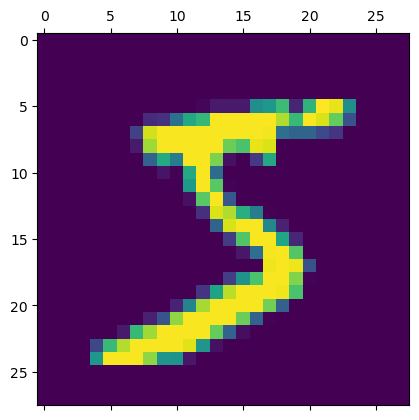

In [3]:
#to see how first image looks
plt.matshow(x_train[0])

In [4]:
#normalising the images by scaling the pixel intensities to the range 0 to 1
x_train = x_train / 255
x_test = x_test / 255

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax')
])    

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
model.compile(optimizer = 'sgd',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [9]:
history = model.fit(x_train,y_train,validation_data = (x_test,y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6437 - accuracy: 0.8401 - val_loss: 0.3533 - val_accuracy: 0.9039
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3362 - accuracy: 0.9061 - val_loss: 0.2931 - val_accuracy: 0.9190
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2886 - accuracy: 0.9187 - val_loss: 0.2601 - val_accuracy: 0.9262
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2586 - accuracy: 0.9269 - val_loss: 0.2384 - val_accuracy: 0.9325
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2356 - accuracy: 0.9343 - val_loss: 0.2190 - val_accuracy: 0.9382
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2168 - accuracy: 0.9398 - val_loss: 0.2017 - val_accuracy: 0.9435
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2008 - accuracy: 0.9441 - val_loss: 0.1902 - val_accuracy:

In [10]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print("Loss = %.3f" %test_loss)
print("Accuracy = %.3f" %test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1608 - accuracy: 0.9540
Loss = 0.161
Accuracy = 0.954


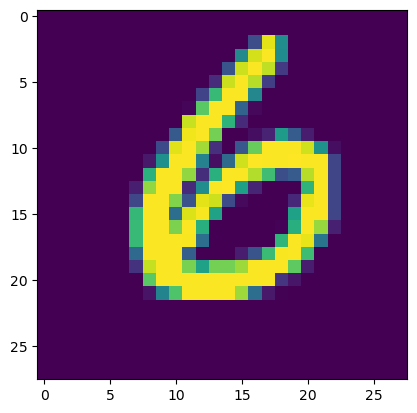

In [11]:
n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

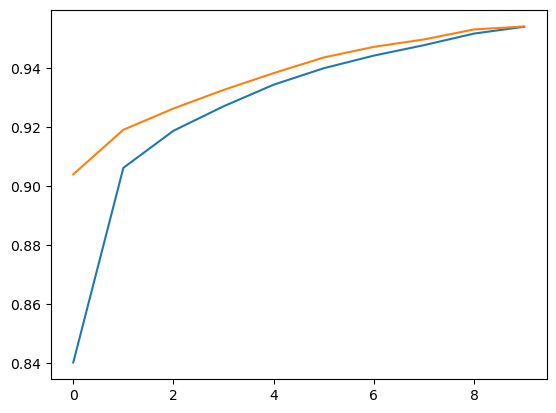

In [13]:
history.history.keys()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

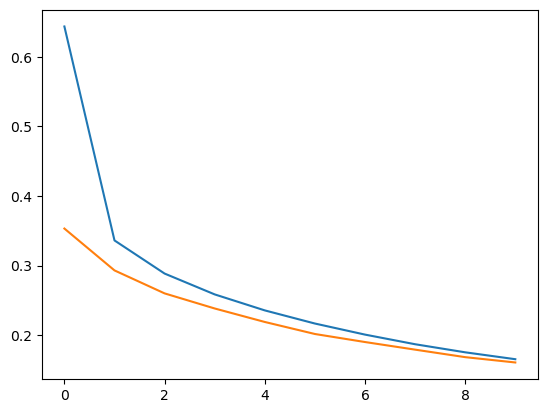

In [14]:
history.history.keys()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()